# Импорты

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Загрузка файла
#! pip install gdown
! gdown --id 1fDMILp8fd8Ue7pudm4uoF6lQ-bHoEXCN

C:\Users\baske\anaconda3\lib\site-packages\gdown\__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1fDMILp8fd8Ue7pudm4uoF6lQ-bHoEXCN
To: C:\Users\baske\Kaggle\playground_series_s4e6\playground-series-s4e6.zip

  0%|          | 0.00/3.22M [00:00<?, ?B/s]
 16%|#6        | 524k/3.22M [00:00<00:01, 1.84MB/s]
 33%|###2      | 1.05M/3.22M [00:00<00:00, 2.43MB/s]
 65%|######5   | 2.10M/3.22M [00:00<00:00, 3.42MB/s]
 81%|########1 | 2.62M/3.22M [00:00<00:00, 2.94MB/s]
100%|##########| 3.22M/3.22M [00:00<00:00, 3.24MB/s]


In [4]:
import zipfile
with zipfile.ZipFile(r"C:\Users\baske\Kaggle\playground_series_s4e6\playground-series-s4e6.zip","r") as zip_ref:
    zip_ref.extractall(r"C:\Users\baske\Kaggle\playground_series_s4e6")

In [5]:
#Подгрузка библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set(rc={'figure.figsize':(4,7)})

pd.set_option('display.max_columns', None)

#!pip uninstall scikit-learn --yes
#!pip install scikit-learn==1.2.2
import sklearn

from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
from sklearn.metrics import f1_score, auc, roc_auc_score

from sklearn.model_selection import train_test_split

#! pip install optuna
import optuna

#! pip install catboost
import catboost
from catboost import CatBoostClassifier, FeaturesData, metrics,  Pool, cv

import lightgbm as lgb
from lightgbm import LGBMClassifier

import xgboost
from xgboost import XGBClassifier

In [6]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score
from sklearn.model_selection import cross_validate, KFold
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
import optuna

In [7]:
break

SyntaxError: 'break' outside loop (Temp/ipykernel_22544/668683560.py, line 1)

# 🔃 Точка рестарта 🔃

In [7]:
train = pd.read_csv(r'C:\Users\baske\Kaggle\playground_series_s4e6\train.csv')
test = pd.read_csv(r'C:\Users\baske\Kaggle\playground_series_s4e6\test.csv')

In [14]:
X = ['Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       "Mother's qualification", "Father's qualification",
       "Mother's occupation", "Father's occupation", 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP']


cat_features = ['Marital status', 'Application mode', 'Course',
                'Daytime/evening attendance', 'Previous qualification',
                'Nacionality', "Mother's qualification",
                "Father's qualification", "Mother's occupation", "Father's occupation",
                'Displaced', 'Educational special needs', 'Debtor',
                'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International'
    
]

y = ['Target']

RANDOM = 3

In [7]:
train.sample(5)

id  Marital status  Application mode  Application order  Course  \
62690  62690               1                 1                  1    9500   
41658  41658               1                 1                  1    9147   
5428    5428               1                17                  2    9500   
75420  75420               2                39                  1    9254   
63651  63651               1                 1                  3    9238   

       Daytime/evening attendance  Previous qualification  \
62690                           1                       1   
41658                           1                       1   
5428                            1                       1   
75420                           1                       1   
63651                           1                       1   

       Previous qualification (grade)  Nacionality  Mother's qualification  \
62690                           150.0            1                      19   
41658                           135.0            1                      19   
5428                            118.0            1                       1   
75420                           133.1            1                      37   
63651                           127.0            1                      12   

       Father's qualification  Mother's occupation  Father's occupation  \
62690                      19                    4                    7   
41658                       1                    4                    4   
5428                       38                    4                    8   
75420                      38                    9                    9   
63651                      38                    9                    9   

       Admission grade  Displaced  Educational special needs  Debtor  \
62690            131.5          0                          0       0   
41658            121.0          0                          0       0   
5428             118.0          1                          0       0   
75420            120.0          0                          0       0   
63651            116.8          1                          0       0   

       Tuition fees up to date  Gender  Scholarship holder  Age at enrollment  \
62690                        1       0                   1                 18   
41658                        1       1                   0                 22   
5428                         1       0                   0                 19   
75420                        1       1                   0                 50   
63651                        1       0                   0                 18   

       International  Curricular units 1st sem (credited)  \
62690              0                                    0   
41658              0                                    0   
5428               0                                    0   
75420              0                                    0   
63651              0                                    0   

       Curricular units 1st sem (enrolled)  \
62690                                    8   
41658                                    5   
5428                                     7   
75420                                    6   
63651                                    6   

       Curricular units 1st sem (evaluations)  \
62690                                       8   
41658                                       7   
5428                                        8   
75420                                       8   
63651                                       8   

       Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  \
62690                                    7                         14.842857   
41658                                    4                         11.250000   
5428                                     5                         11.820000   
75420                                    0                          0.000000   
6

In [8]:
train.columns

Index(['id', 'Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units

In [8]:
train['Target'].value_counts()

Graduate    36282
Dropout     25296
Enrolled    14940
Name: Target, dtype: int64

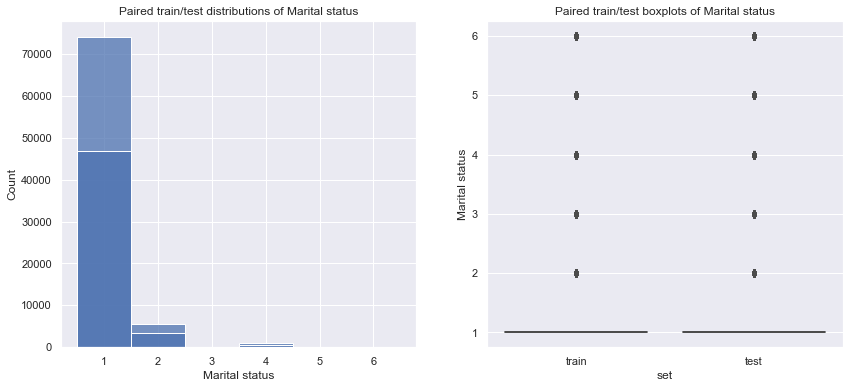

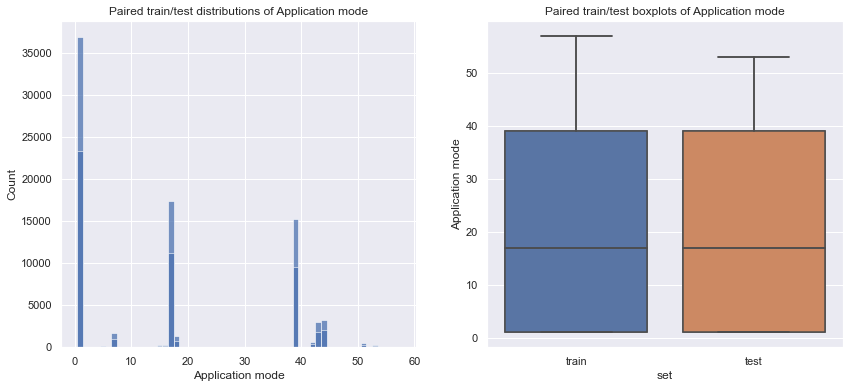

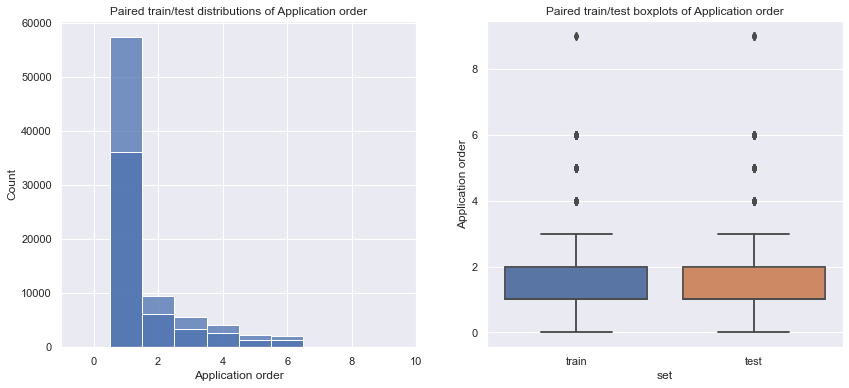

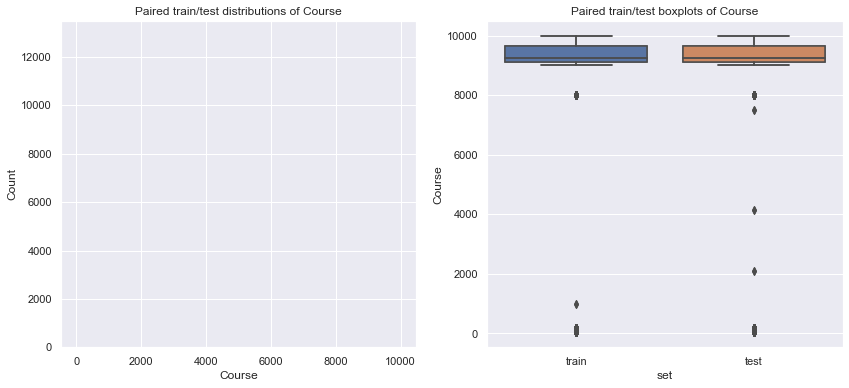

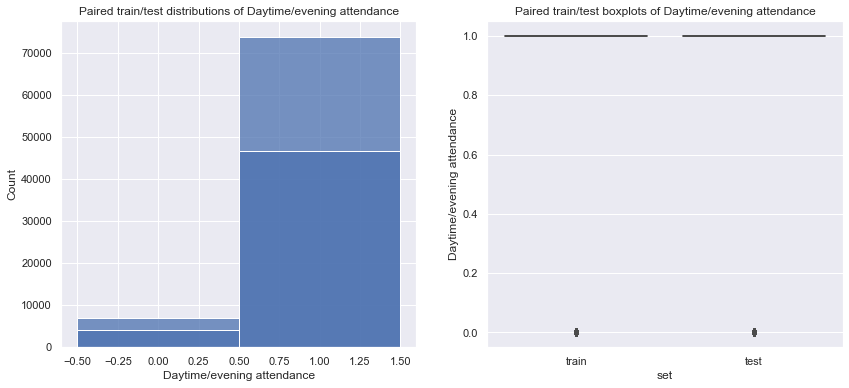

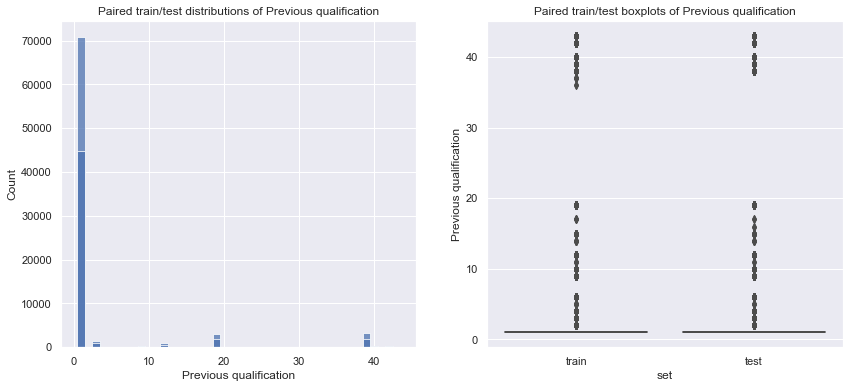

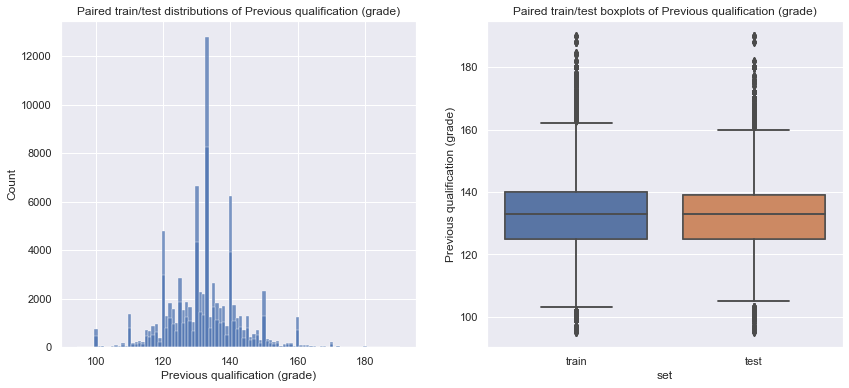

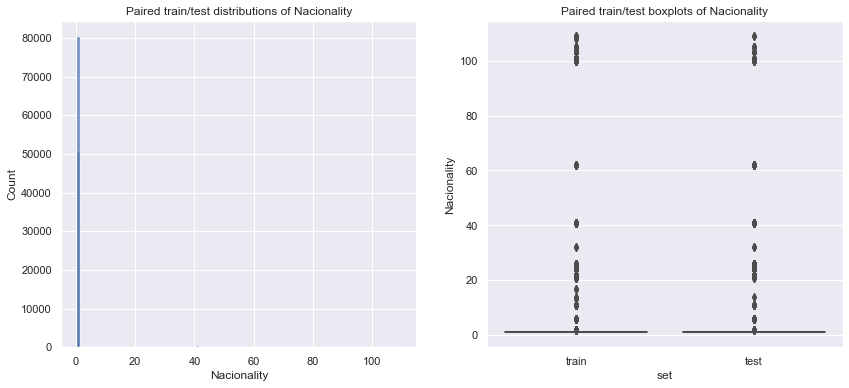

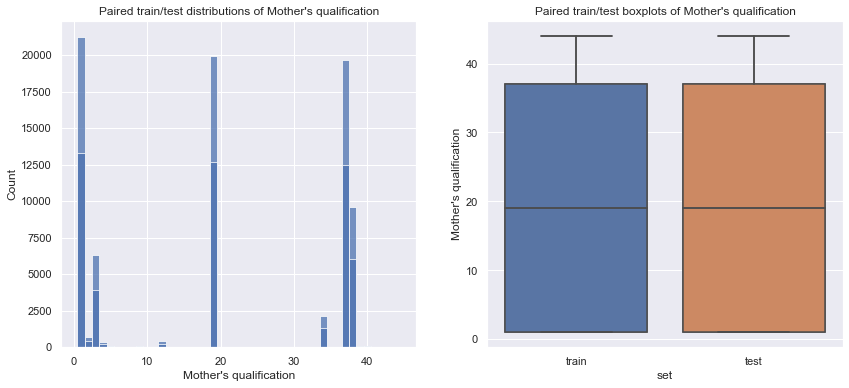

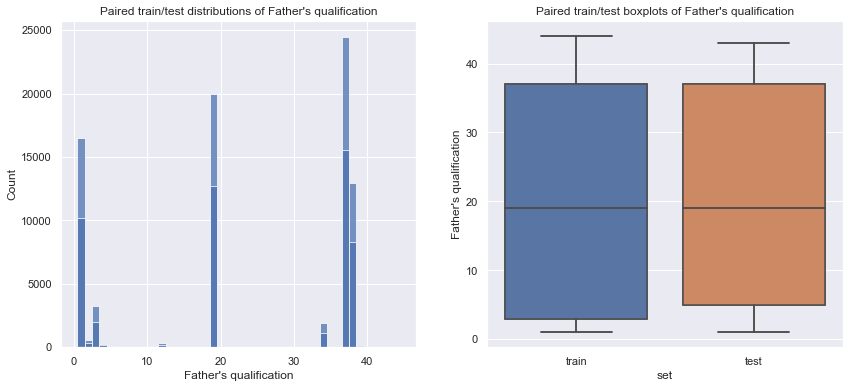

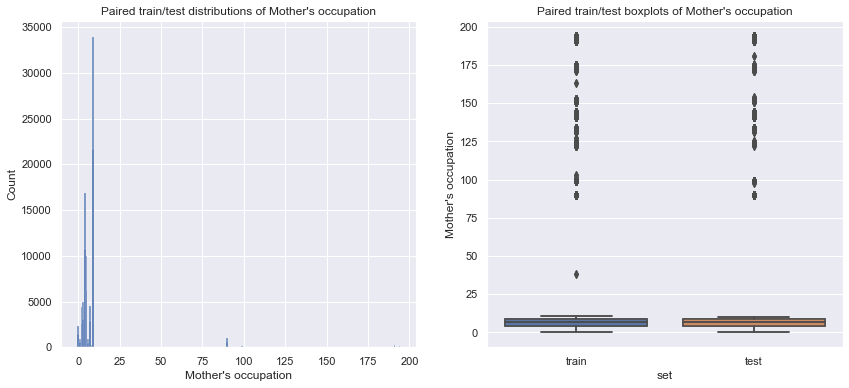

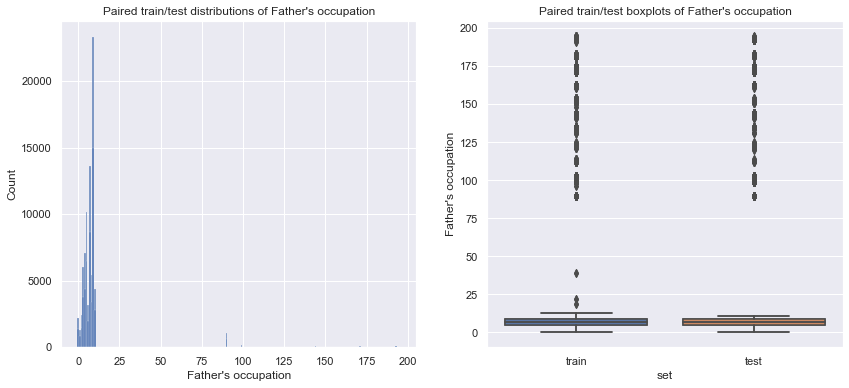

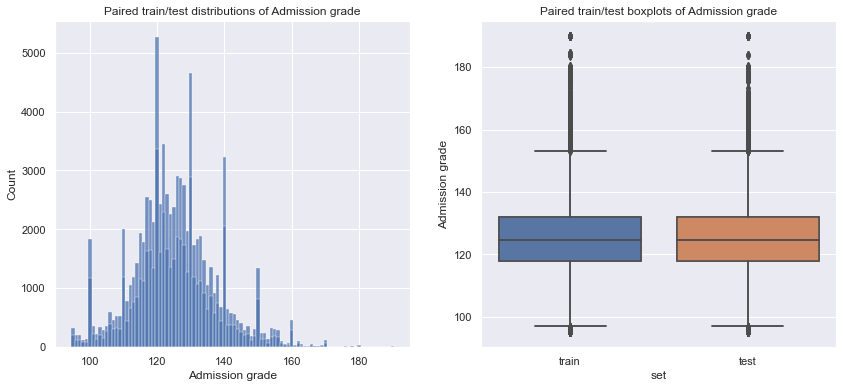

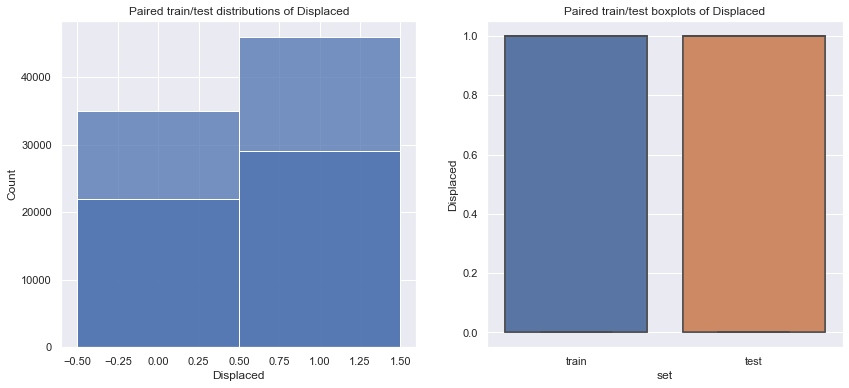

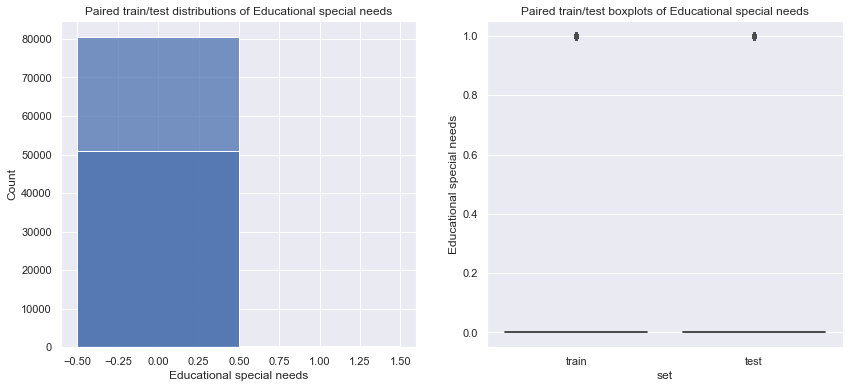

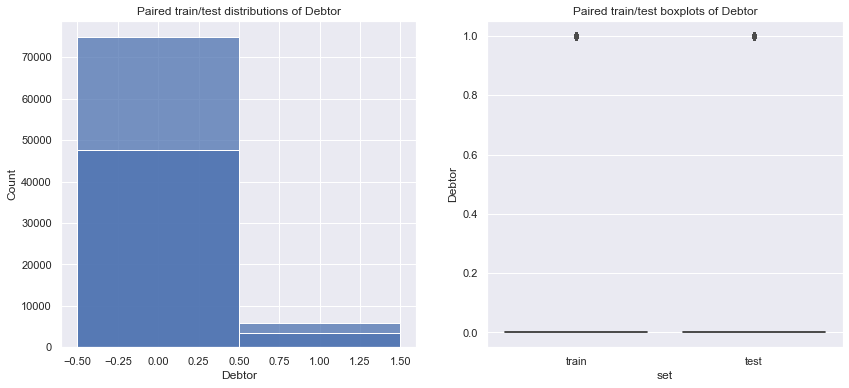

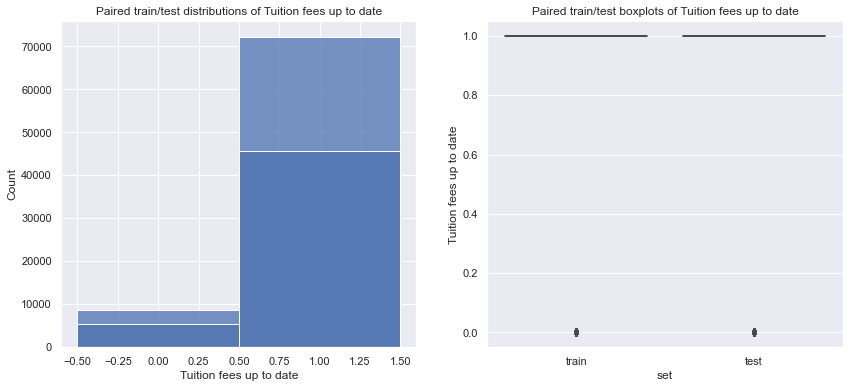

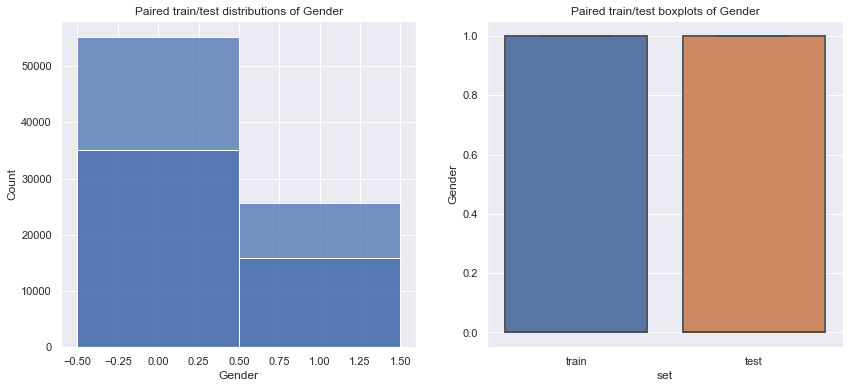

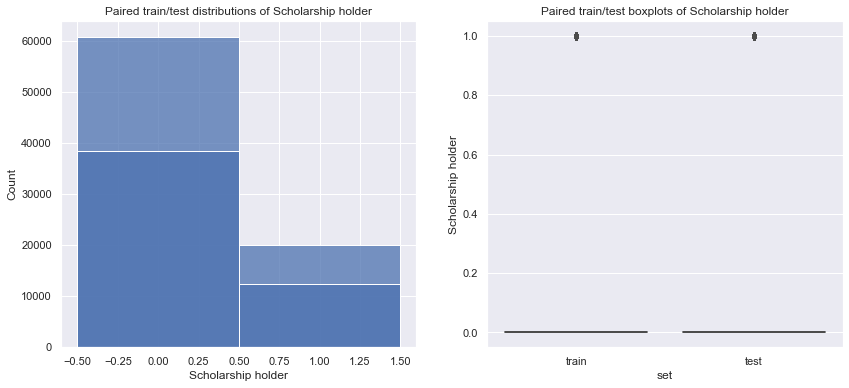

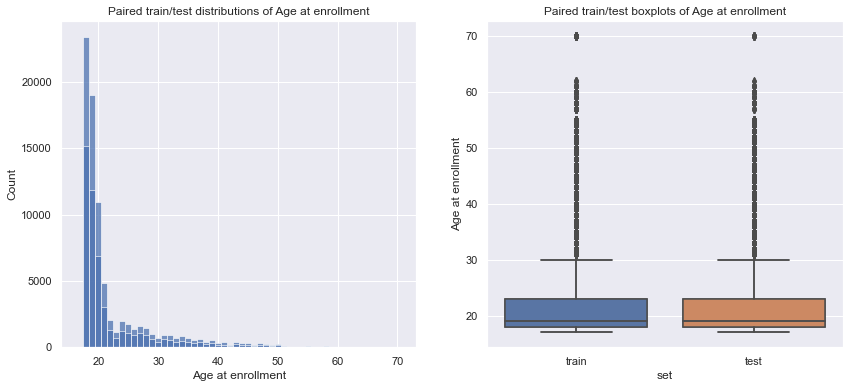

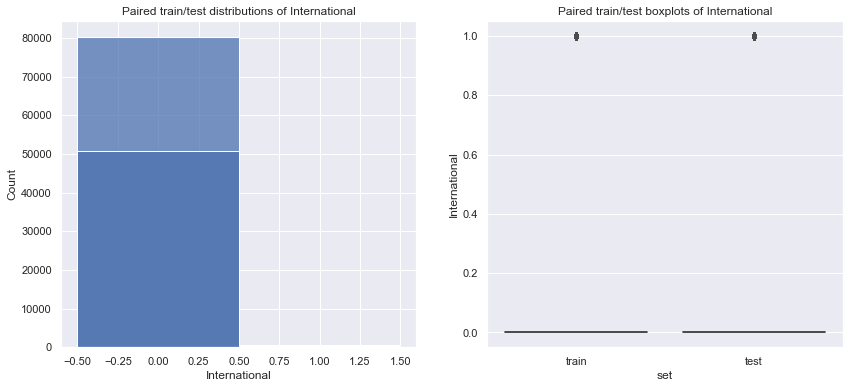

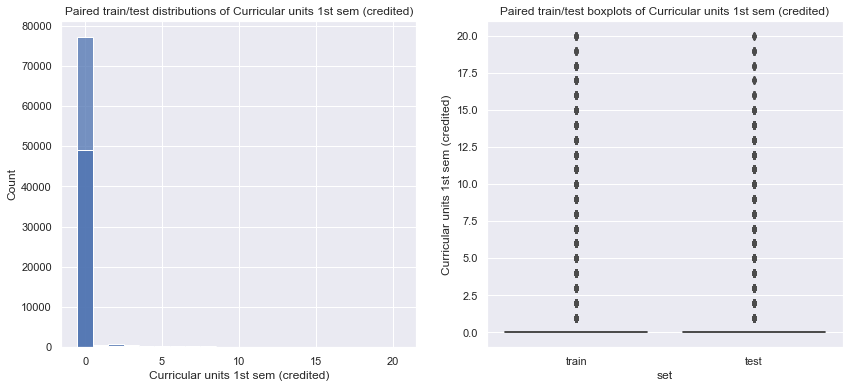

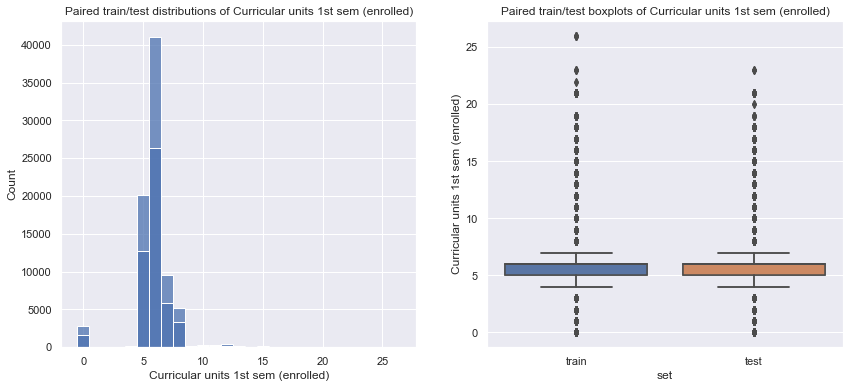

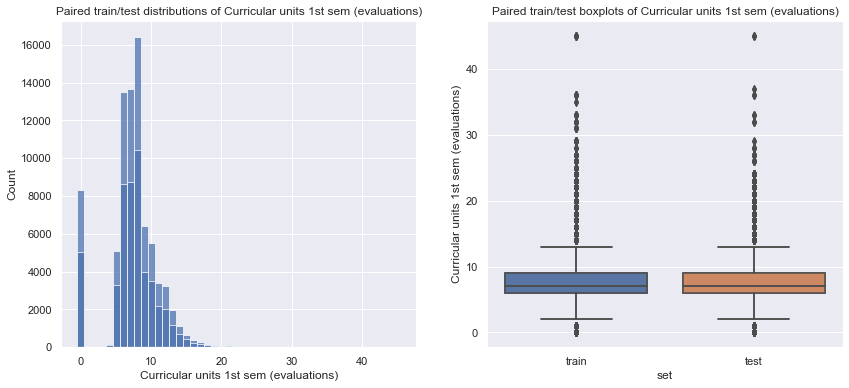

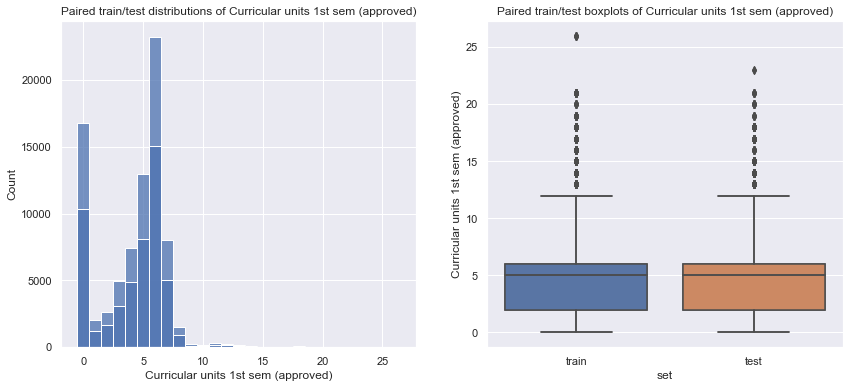

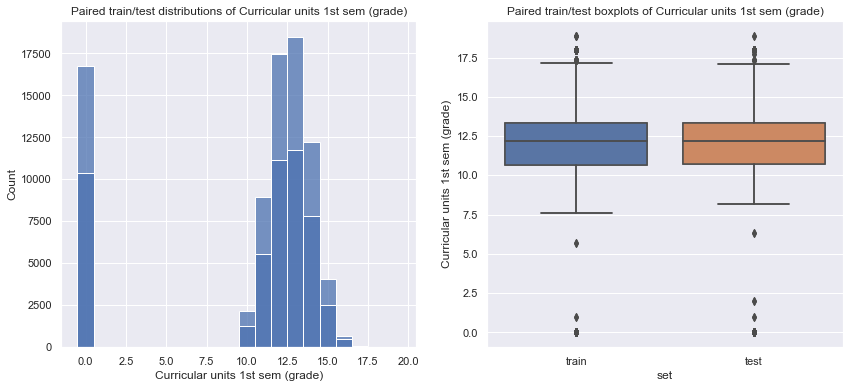

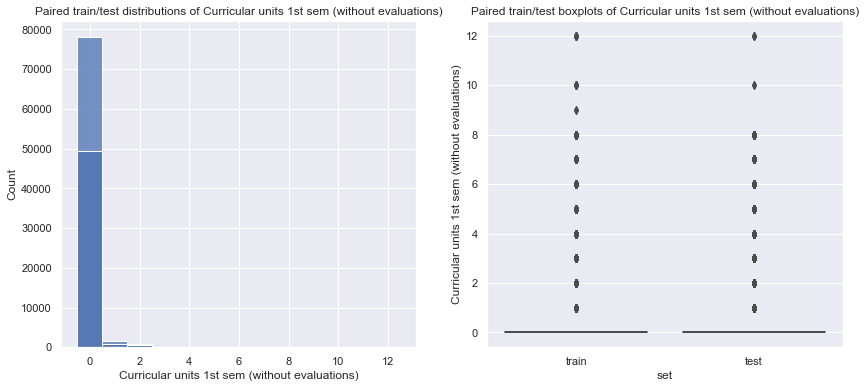

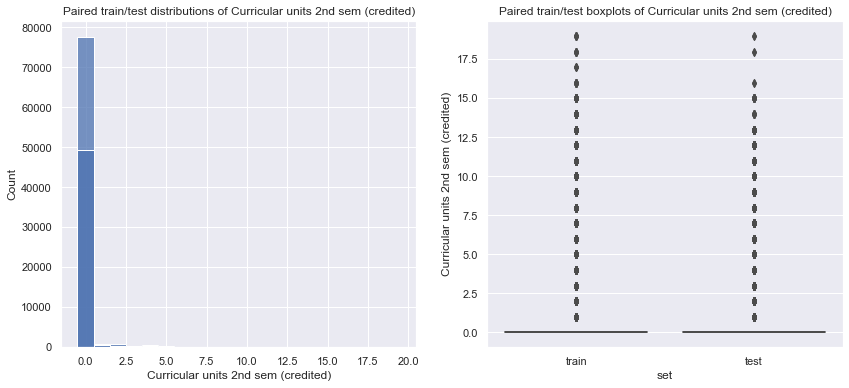

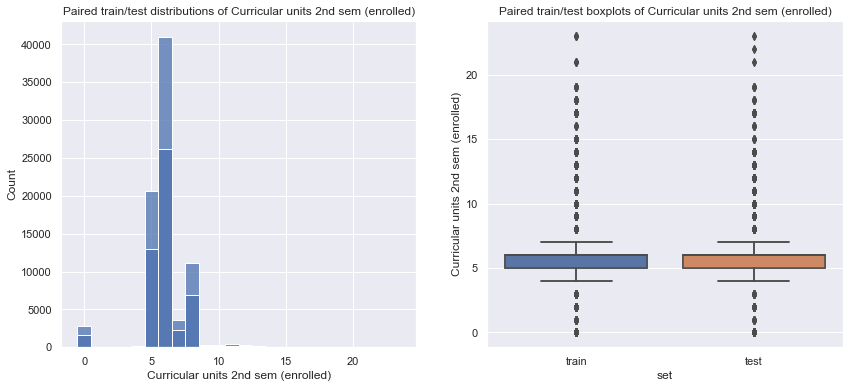

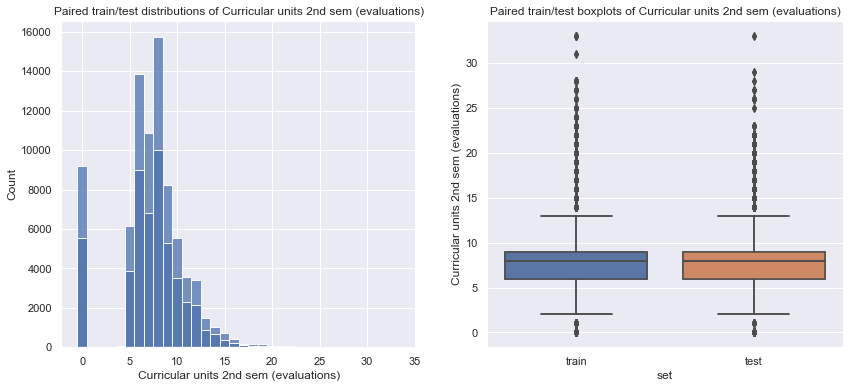

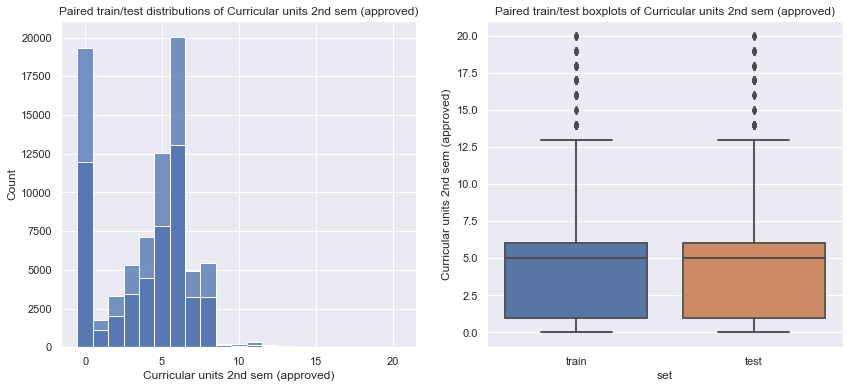

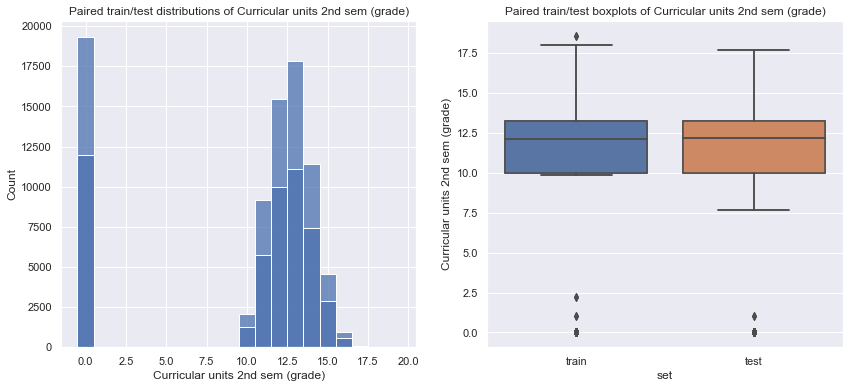

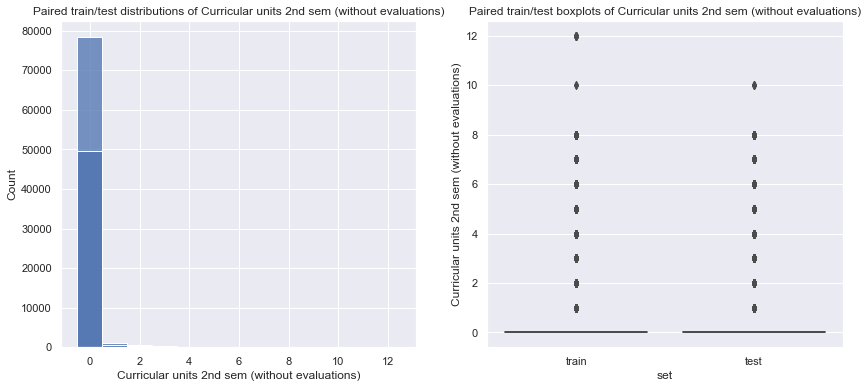

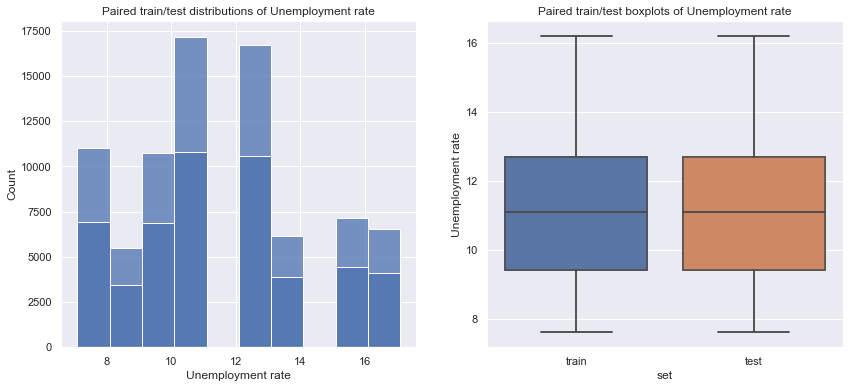

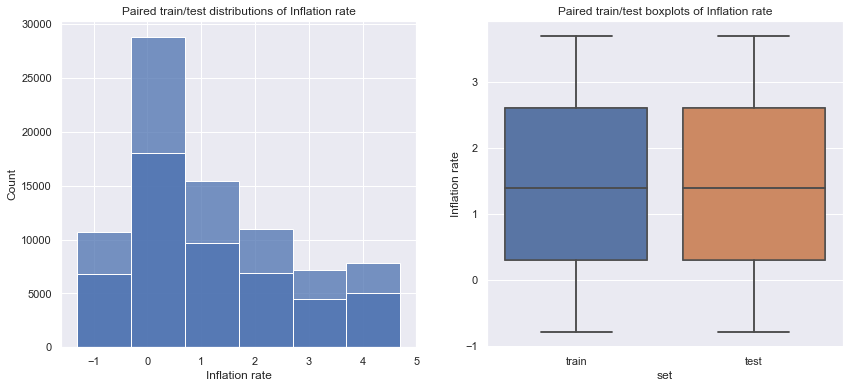

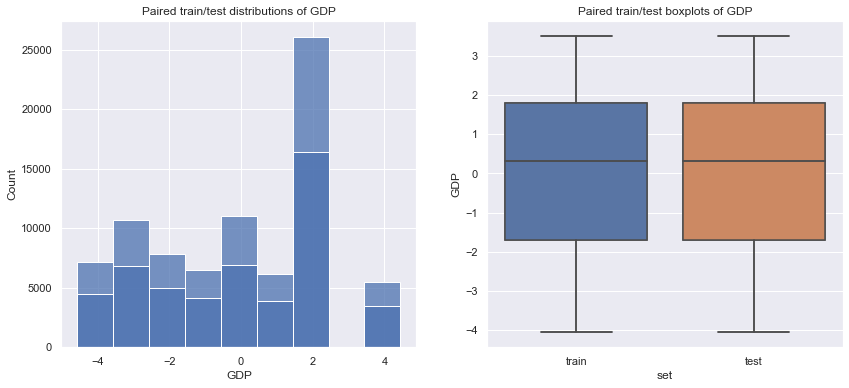

In [15]:
import warnings

def plot_distribution_pairs(train, test, feature, hue="set", palette=None):
    data_df = train.copy()
    data_df['set'] = 'train'
    data_df = pd.concat([data_df, test.copy()]).fillna('test')
    data_df.replace([np.inf, -np.inf], np.nan, inplace=True)

    f, axes = plt.subplots(1, 2, figsize=(14, 6))
    for i, s in enumerate(data_df[hue].unique()):
        selection = data_df.loc[data_df[hue]==s, feature]
        # Filter 'selection' to include only the central 95% of the data
        #q_025, q_975 = np.percentile(selection, [2.5, 97.5])
        selection_filtered = selection #selection[(selection >= q_025) & (selection <= q_975)]
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=FutureWarning)
            sns.histplot(selection_filtered, discrete=True, label=s, ax=axes[0])
            sns.boxplot(x=hue, y=feature, data=data_df, ax=axes[1])
    axes[0].set_title(f"Paired train/test distributions of {feature}")
    axes[1].set_title(f"Paired train/test boxplots of {feature}")
    #axes[0].legend()
    #axes[1].legend()
    plt.show()


for feature in X:
    plot_distribution_pairs(train, test, feature)

In [12]:
train.sample(10)

id  Marital status  Application mode  Application order  Course  \
21188  21188               1                17                  2    9254   
5003    5003               1                 1                  2    9238   
38586  38586               1                39                  1    9147   
45021  45021               1                44                  1    8014   
11424  11424               1                17                  1    9238   
4627    4627               1                 1                  1    9070   
32267  32267               1                 1                  1    9773   
22400  22400               1                 1                  1    9773   
47251  47251               1                17                  1    9853   
61462  61462               1                 1                  2    9147   

       Daytime/evening attendance  Previous qualification  \
21188                           1                       1   
5003                            1                       1   
38586                           1                       1   
45021                           0                      39   
11424                           1                       1   
4627                            1                       1   
32267                           1                       1   
22400                           1                       1   
47251                           1                       1   
61462                           1                       1   

       Previous qualification (grade)  Nacionality  Mother's qualification  \
21188                           119.0            1                       1   
5003                            133.1            1                      37   
38586                           100.0            1                      37   
45021                           130.0            1                      37   
11424                           125.0            1                      19   
4627                            148.0            1                      19   
32267                           153.0            1                      19   
22400                           150.0            1                       1   
47251                           133.0            1                       3   
61462                           157.0            1                       1   

       Father's qualification  Mother's occupation  Father's occupation  \
21188                       1                    9                    9   
5003                       37                    9                    9   
38586                      37                    5                    5   
45021                      37                    5                    5   
11424                      19                    5                    7   
4627                        1                    4                    4   
32267                      38                    4                    9   
22400                      19                    4                   10   
47251                      37                    5                    5   
61462                      19                    7                    7   

       Admission grade  Displaced  Educational special needs  Debtor  \
21188            118.0          1                          0       0   
5003             117.0          0                          0       0   
38586            130.0          0                          0       0   
45021            130.0          0                          0       0   
11424            125.1          0                          0       0   
4627             139.4          0                          0       0   
32267            138.8          1                          0       0   
22400            139.7          1                          0       0   
47251            123.9          1                          0       0   
61462            146.7          0                          0       0   

       Tuiti

In [21]:
train[cat_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Marital status              76518 non-null  int64
 1   Application mode            76518 non-null  int64
 2   Course                      76518 non-null  int64
 3   Daytime/evening attendance  76518 non-null  int64
 4   Previous qualification      76518 non-null  int64
 5   Nacionality                 76518 non-null  int64
 6   Mother's qualification      76518 non-null  int64
 7   Father's qualification      76518 non-null  int64
 8   Mother's occupation         76518 non-null  int64
 9   Father's occupation         76518 non-null  int64
 10  Displaced                   76518 non-null  int64
 11  Educational special needs   76518 non-null  int64
 12  Debtor                      76518 non-null  int64
 13  Tuition fees up to date     76518 non-null  int64
 14  Gender

#  Catboost Model

In [48]:
%%time


def objective(trial):

    
    # Hyperparameters for the CatBoost model
    params = {
        "verbose": False,
        "iterations": trial.suggest_int("iterations", 900, 1250, step = 25),
        #"loss_function": #'MultiClassOneVsAll' не улучшилось на пяти итерациях, 
        #'MultiClass', - база 
        #'MultiClass', #'MultiCrossEntropy', #'MultiRMSE'
        "random_state": RANDOM,
        "depth": 5, #trial.suggest_int("depth", 2, 9),
        #"subsample": trial.suggest_float("subsample", 0.4, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 5, 250, step = 1),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.05, 1.0),
        "learning_rate": trial.suggest_float("learning_rate", 0.1025, 0.185, log=True),
        "cat_features": cat_features
    }
    
    
    cv = KFold(n_splits=5, shuffle=True, random_state=RANDOM)
    
    scores  = []
    scores_acc = []
    #scores_r2 = []
    
    for _, (train_index, valid_index) in tqdm(enumerate(cv.split(train[X], train[y])) ):
        X_train, y_train = train[X].iloc[train_index], train[y].iloc[train_index]
        X_valid, y_valid = train[X].iloc[valid_index], train[y].iloc[valid_index]
        
        CATB_model = CatBoostClassifier(**params)

        CATB_model.fit(X_train, y_train, 
                  eval_set=(X_valid, y_valid),
                  early_stopping_rounds=100)
        
        y_pred = CATB_model.predict(X_valid)
        
        #print(y_valid, y_pred)
        #возможность поменять функцию оптимизации
        #rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
        #r2 = r2_score(y_valid, y_pred)
        acc = accuracy_score(y_valid, y_pred)
        #scores_rmse.append(rmse)
        scores_acc.append(acc)
        #scores_r2.append(r2)
        
    print(scores_acc, 
          "\n",
          round(np.mean(scores_acc), 5)
          #round(np.mean(scores_rmse), 5)
         )
    
    return np.mean(scores_acc)


study_name = "optuna_CATB"  # Unique identifier of the study.
storage_name = "sqlite:///{}.db".format(study_name)

study_CATB = optuna.create_study(direction='maximize', study_name=study_name, 
                            storage=storage_name,
                            load_if_exists=True)

study_CATB.optimize(objective, n_trials=3)

print(f"Best trial average Accuracy_score: {study_CATB.best_value:.4f}")

for key, value in study_CATB.best_params.items():
    print(f"{key}: {value}")

[I 2024-06-06 15:49:15,826] Using an existing study with name 'optuna_CATB' instead of creating a new one.


0it [00:00, ?it/s]

[I 2024-06-06 16:01:44,163] Trial 70 finished with value: 0.8326537229032953 and parameters: {'iterations': 950, 'min_data_in_leaf': 218, 'colsample_bylevel': 0.43459157244855373, 'learning_rate': 0.1462983723286068}. Best is trial 69 with value: 0.833307134035026.


[0.8307631991636174, 0.8344223732357554, 0.8352064819654992, 0.8314709534078285, 0.8314056067437757] 
 0.83265


0it [00:00, ?it/s]

[I 2024-06-06 16:19:00,625] Trial 71 finished with value: 0.832601435324275 and parameters: {'iterations': 1025, 'min_data_in_leaf': 212, 'colsample_bylevel': 0.43860907361554485, 'learning_rate': 0.14654359201570952}. Best is trial 69 with value: 0.833307134035026.


[0.8312205959226346, 0.834553058024046, 0.8354025091479352, 0.8309481800954062, 0.8308828334313534] 
 0.8326


0it [00:00, ?it/s]

[I 2024-06-06 16:35:04,595] Trial 72 finished with value: 0.8328366576954203 and parameters: {'iterations': 975, 'min_data_in_leaf': 235, 'colsample_bylevel': 0.37690610758071236, 'learning_rate': 0.1418653475670217}. Best is trial 69 with value: 0.833307134035026.


[0.8320700470465238, 0.8357945635128071, 0.8352718243596445, 0.8312749134156702, 0.8297719401424557] 
 0.83284
Best trial average Accuracy_score: 0.8333
iterations: 950
min_data_in_leaf: 210
colsample_bylevel: 0.42794936668027705
learning_rate: 0.14757567916094544
Wall time: 45min 48s


In [49]:
display(optuna.visualization.plot_optimization_history(study_CATB))

In [27]:
best_trial = study_CATB.best_trial
best_trial

model = catboost.CatBoostClassifier(**best_trial.params, silent=True)

train_data = Pool(data=train[X], label=train[y])

model.fit(train_data)

#запись предиктов
test['pred'] = model.predict(test[X])

test['Target'] = test['pred']

test[['id']+y].to_csv('S4E6_it0_CATBOOST.csv', index = False)

# LGBM model

In [72]:
%%time


def objective(trial):

    
    # Hyperparameters for the LightGBM model
    params = {
        'num_leaves': trial.suggest_int('num_leaves', 50, 650, step = 5), 
        'learning_rate': trial.suggest_float("learning_rate", 0.035, 0.095, log=True), 
        'n_estimators': trial.suggest_int('n_estimators', 850, 1500, step = 25),
        'subsample_for_bin': trial.suggest_int('subsample_for_bin', 170000, 809000, step = 10000), 
        'min_child_samples': trial.suggest_int("min_child_samples", 1, 100, step = 5), 
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10), 
        'colsample_bytree': trial.suggest_float("colsample_bytree", 0.05, 1.0),
        'subsample': trial.suggest_float("subsample", 0.5, 1.0), 
        'max_depth': 4, #trial.suggest_int("max_depth", 4, 6, step = 1),
        'verbose': -1,
        "cat_features": cat_features,
    }
    
    
    cv = KFold(n_splits=5, shuffle=True, random_state=RANDOM)
    
    scores = []
    scores_r2 = []
    scores_acc = []
    
    for _, (train_index, valid_index) in tqdm( enumerate(cv.split(train[X], train[y])) ):
        X_train, y_train = train[X].iloc[train_index], train[y].iloc[train_index]
        X_valid, y_valid = train[X].iloc[valid_index], train[y].iloc[valid_index]
        
        LGBM_model = LGBMClassifier(**params)

        LGBM_model.fit(X_train, y_train, 
                  eval_set=[(X_train, y_train), (X_valid, y_valid)])
        
        y_pred = LGBM_model.predict(X_valid)
        
        acc = accuracy_score(y_valid, y_pred)
        #rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
        #r2 = r2_score(y_valid, y_pred)
        
        scores_acc.append(acc) #возможность поменять функцию оптимизации

        
    print(scores_acc, 
          "\n",
          round(np.mean(scores_acc), 5)
         )
    
    return np.mean(scores_acc)

study_name = "optuna_LGBM_class"  # Unique identifier of the study.
storage_name = "sqlite:///{}.db".format(study_name)

study_LGBM = optuna.create_study(direction='maximize', study_name=study_name, 
                            storage=storage_name,
                            load_if_exists=True)

study_LGBM.optimize(objective, n_trials=5)

print(f"Best trial average Accuracy_score: {study_LGBM.best_value:.4f}")

for key, value in study_LGBM.best_params.items():
    print(f"{key}: {value}")

[I 2024-06-07 12:35:58,265] Using an existing study with name 'optuna_LGBM_class' instead of creating a new one.


0it [00:00, ?it/s]

[I 2024-06-07 12:37:33,251] Trial 32 finished with value: 0.8341304840684799 and parameters: {'num_leaves': 165, 'learning_rate': 0.06178739723918254, 'n_estimators': 1000, 'subsample_for_bin': 214530, 'min_child_samples': 1, 'reg_alpha': 0.10666386114111298, 'reg_lambda': 8.989861554450279, 'colsample_bytree': 0.29956385276054165, 'subsample': 0.5308188601631076}. Best is trial 24 with value: 0.8345094631226708.


[0.8354025091479352, 0.836578672242551, 0.8340303188708834, 0.8327778866888845, 0.8318630333921453] 
 0.83413


0it [00:00, ?it/s]

[I 2024-06-07 12:39:14,463] Trial 33 finished with value: 0.8340390047166764 and parameters: {'num_leaves': 235, 'learning_rate': 0.06710109246649902, 'n_estimators': 1225, 'subsample_for_bin': 114530, 'min_child_samples': 11, 'reg_alpha': 1.0392204629877702, 'reg_lambda': 9.985112194145323, 'colsample_bytree': 0.1113094599193606, 'subsample': 0.5894663686042821}. Best is trial 24 with value: 0.8345094631226708.


[0.8346184004181914, 0.8359252483010977, 0.8350104547830632, 0.8331046200091485, 0.8315363000718813] 
 0.83404


0it [00:00, ?it/s]

[I 2024-06-07 12:41:00,642] Trial 34 finished with value: 0.8347185826954178 and parameters: {'num_leaves': 125, 'learning_rate': 0.06717881928011357, 'n_estimators': 1150, 'subsample_for_bin': 294530, 'min_child_samples': 36, 'reg_alpha': 0.71063523098273, 'reg_lambda': 8.387087476227045, 'colsample_bytree': 0.1769156354553656, 'subsample': 0.5224659952161821}. Best is trial 34 with value: 0.8347185826954178.


[0.8357292211186618, 0.836186617877679, 0.8357292211186618, 0.8342155132980461, 0.8317323400640397] 
 0.83472


0it [00:00, ?it/s]

[I 2024-06-07 12:42:48,542] Trial 35 finished with value: 0.8336861421245878 and parameters: {'num_leaves': 50, 'learning_rate': 0.06727896117453948, 'n_estimators': 1150, 'subsample_for_bin': 284530, 'min_child_samples': 36, 'reg_alpha': 1.4603547216106822, 'reg_lambda': 8.347400134183331, 'colsample_bytree': 0.3739736884194066, 'subsample': 0.5803749019581051}. Best is trial 34 with value: 0.8347185826954178.


[0.8352718243596445, 0.8361212754835338, 0.8334422373235756, 0.8309481800954062, 0.832647193360779] 
 0.83369


0it [00:00, ?it/s]

[I 2024-06-07 12:44:34,718] Trial 36 finished with value: 0.8338821744309127 and parameters: {'num_leaves': 105, 'learning_rate': 0.0771622318214503, 'n_estimators': 1250, 'subsample_for_bin': 374530, 'min_child_samples': 31, 'reg_alpha': 2.648591707201737, 'reg_lambda': 7.28724700905272, 'colsample_bytree': 0.16735693551257033, 'subsample': 0.671854889391344}. Best is trial 34 with value: 0.8347185826954178.


[0.8349451123889179, 0.8355331939362258, 0.8349451123889179, 0.8328432333529373, 0.8311442200875645] 
 0.83388
Best trial average Accuracy_score: 0.8347
num_leaves: 125
learning_rate: 0.06717881928011357
n_estimators: 1150
subsample_for_bin: 294530
min_child_samples: 36
reg_alpha: 0.71063523098273
reg_lambda: 8.387087476227045
colsample_bytree: 0.1769156354553656
subsample: 0.5224659952161821
Wall time: 8min 36s


In [74]:
display(optuna.visualization.plot_optimization_history(study_LGBM))

In [75]:
best_trial = study_LGBM.best_trial
best_trial

model = LGBMClassifier(**best_trial.params, silent=True)

train_data = Pool(data=train[X], label=train[y])

model.fit(train[X], train[y])

#запись предиктов
test['pred'] = model.predict(test[X])

test['Target'] = test['pred']

test[['id']+y].to_csv('S4E6_it0_LGBM.csv', index = False)

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003830 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1387
[LightGBM] [Info] Number of data points in the train set: 76518, number of used features: 36
[LightGBM] [Info] Start training from score -1.106880
[LightGBM] [Info] Start training from score -1.633484
[LightGBM] [Info] Start training from score -0.746204
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

# Подмешиваем оригинальный датасет

In [8]:
#Загрузка файла
# https://drive.google.com/file/d/1vLxMlXdDVaV4f45R-kul5lO0_7aWETd5/view?usp=sharing
! gdown --id 1vLxMlXdDVaV4f45R-kul5lO0_7aWETd5

C:\Users\baske\anaconda3\lib\site-packages\gdown\__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1vLxMlXdDVaV4f45R-kul5lO0_7aWETd5
To: C:\Users\baske\Kaggle\playground_series_s4e6\predict+students+dropout+and+academic+success (1).zip

  0%|          | 0.00/533k [00:00<?, ?B/s]
 98%|#########8| 524k/533k [00:00<00:00, 1.49MB/s]
100%|##########| 533k/533k [00:00<00:00, 1.52MB/s]


In [9]:
with zipfile.ZipFile(r"C:\Users\baske\Kaggle\playground_series_s4e6\predict+students+dropout+and+academic+success (1).zip","r") as zip_ref:
    zip_ref.extractall(r"C:\Users\baske\Kaggle\playground_series_s4e6")

In [10]:
original = pd.read_csv(r'C:\Users\baske\Kaggle\playground_series_s4e6\data.csv', sep = ';')
original = original.rename(columns={"Daytime/evening attendance\t": "Daytime/evening attendance"})

train = pd.read_csv(r'C:\Users\baske\Kaggle\playground_series_s4e6\train.csv')

In [11]:
original.sample(10)

Marital status  Application mode  Application order  Course  \
991                1                 1                  1    9130   
778                1                17                  1    9853   
3179               1                43                  1    9500   
855                1                 1                  3    9773   
3341               1                17                  1    9670   
1544               1                39                  1    8014   
2468               1                43                  1    9070   
2209               1                 1                  5    9773   
4206               1                 1                  1    9254   
3964               1                17                  1    9238   

      Daytime/evening attendance  Previous qualification  \
991                            1                       1   
778                            1                       1   
3179                           1                       1   
855                            1                       1   
3341                           1                       1   
1544                           0                       1   
2468                           1                       1   
2209                           1                       1   
4206                           1                       1   
3964                           1                       1   

      Previous qualification (grade)  Nacionality  Mother's qualification  \
991                            135.0            1                       3   
778                            119.0            1                       3   
3179                           140.0            1                      19   
855                            140.0            1                       1   
3341                           138.0            1                       1   
1544                           133.1            1                      34   
2468                           125.0            1                      38   
2209                           131.0            1                       1   
4206                           144.0            1                      19   
3964                           120.0            1                      19   

      Father's qualification  Mother's occupation  Father's occupation  \
991                        3                    2                    2   
778                        3                  132                  132   
3179                      38                    9                    7   
855                       39                    4                    1   
3341                       1                    4                    8   
1544                      34                    0                    0   
2468                      37                    8                    7   
2209                      38                    9                    5   
4206                      19                    9                    9   
3964                      19                    4                    5   

      Admission grade  Displaced  Educational special needs  Debtor  \
991             137.1          1                          0       0   
778             110.6          0                          0       0   
3179            125.7          1                          0       0   
855             128.1          1                          1       0   
3341            123.0          0                          0       1   
1544            100.0          1                          0       0   
2468            131.7          1                          0       0   
2209            132.4          1                          0       1   
4206            142.6          1                          0       0   
3964            114.8          1                          0       1   

      Tuition fees up to date  Gender  Scholarship holder  Age at enrollment  \
991                         1       0                   0   

In [12]:
train.shape, original.shape

((76518, 38), (4424, 37))

In [13]:
train = pd.concat([train, original], axis = 0)

## Повторяем обучение LGBM модели

In [33]:
%%time


def objective(trial):

    
    # Hyperparameters for the LightGBM model
    params = {
        'num_leaves': trial.suggest_int('num_leaves', 190, 450, step = 5), 
        'learning_rate': trial.suggest_float("learning_rate", 0.0385, 0.0625, log=True), 
        'n_estimators': trial.suggest_int('n_estimators', 850, 1500, step = 25),
        'subsample_for_bin': trial.suggest_int('subsample_for_bin', 170000, 809000, step = 10000), 
        'min_child_samples': trial.suggest_int("min_child_samples", 1, 100, step = 5), 
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10), 
        'colsample_bytree': trial.suggest_float("colsample_bytree", 0.05, 1.0),
        'subsample': trial.suggest_float("subsample", 0.5, 1.0), 
        'max_depth': 5, #trial.suggest_int("max_depth", 4, 8, step = 1),
        'verbose': -1,
        "cat_features": cat_features,
    }
    
    
    cv = KFold(n_splits=5, shuffle=True, random_state=RANDOM)
    
    scores = []
    scores_r2 = []
    scores_acc = []
    
    for _, (train_index, valid_index) in tqdm( enumerate(cv.split(train[X], train[y])) ):
        X_train, y_train = train[X].iloc[train_index], train[y].iloc[train_index]
        X_valid, y_valid = train[X].iloc[valid_index], train[y].iloc[valid_index]
        
        LGBM_model = LGBMClassifier(**params)

        LGBM_model.fit(X_train, y_train, 
                  eval_set=[(X_train, y_train), (X_valid, y_valid)])
        
        y_pred = LGBM_model.predict(X_valid)
        
        acc = accuracy_score(y_valid, y_pred)
        #rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
        #r2 = r2_score(y_valid, y_pred)
        
        scores_acc.append(acc) #возможность поменять функцию оптимизации

        
    print(scores_acc, 
          "\n",
          round(np.mean(scores_acc), 5)
         )
    
    return np.mean(scores_acc)

study_name = "optuna_LGBM_with_original"  # Unique identifier of the study.
storage_name = "sqlite:///{}.db".format(study_name)

study_LGBM = optuna.create_study(direction='maximize', study_name=study_name, 
                            storage=storage_name,
                            load_if_exists=True)

study_LGBM.optimize(objective, n_trials=5)

print(f"Best trial average Accuracy_score: {study_LGBM.best_value:.4f}")

for key, value in study_LGBM.best_params.items():
    print(f"{key}: {value}")

[I 2024-06-09 20:34:27,612] Using an existing study with name 'optuna_LGBM_with_original' instead of creating a new one.


0it [00:00, ?it/s]

[I 2024-06-09 20:40:30,189] Trial 80 finished with value: 0.8330656611060083 and parameters: {'num_leaves': 350, 'learning_rate': 0.048534943468290064, 'n_estimators': 1200, 'subsample_for_bin': 430000, 'min_child_samples': 36, 'reg_alpha': 3.51084610172654, 'reg_lambda': 6.418226770512739, 'colsample_bytree': 0.3092293698691507, 'subsample': 0.9416914997440377}. Best is trial 52 with value: 0.8336586609286647.


[0.8334671690654147, 0.8319229106183211, 0.8322831727205338, 0.8356189770200149, 0.8320360761057574] 
 0.83307


0it [00:00, ?it/s]

[I 2024-06-09 20:46:58,613] Trial 81 finished with value: 0.8328432787316821 and parameters: {'num_leaves': 310, 'learning_rate': 0.04950621882498558, 'n_estimators': 1375, 'subsample_for_bin': 610000, 'min_child_samples': 91, 'reg_alpha': 0.7952202146640496, 'reg_lambda': 0.38686385851618643, 'colsample_bytree': 0.19727542674543427, 'subsample': 0.9188859713193327}. Best is trial 52 with value: 0.8336586609286647.


[0.8340848724442522, 0.8309345852121811, 0.8332097850259451, 0.8347541388682975, 0.8312330121077341] 
 0.83284


0it [00:00, ?it/s]

[I 2024-06-09 20:53:15,416] Trial 82 finished with value: 0.832756791863862 and parameters: {'num_leaves': 300, 'learning_rate': 0.04781204439613103, 'n_estimators': 1425, 'subsample_for_bin': 550000, 'min_child_samples': 91, 'reg_alpha': 2.495797825535484, 'reg_lambda': 9.078319708814904, 'colsample_bytree': 0.13519106080830723, 'subsample': 0.9236394963473876}. Best is trial 52 with value: 0.8336586609286647.


[0.8332818580517636, 0.8319846809562048, 0.8322831727205338, 0.8351865579441562, 0.8310476896466519] 
 0.83276


0it [00:00, ?it/s]

[I 2024-06-09 20:58:56,235] Trial 83 finished with value: 0.8333127455101916 and parameters: {'num_leaves': 290, 'learning_rate': 0.050890945626316096, 'n_estimators': 1350, 'subsample_for_bin': 500000, 'min_child_samples': 86, 'reg_alpha': 1.762103745783179, 'reg_lambda': 1.1993364459795137, 'colsample_bytree': 0.17591915367725838, 'subsample': 0.9793540236986535}. Best is trial 52 with value: 0.8336586609286647.


[0.8345172648094386, 0.8318611402804373, 0.8333333333333334, 0.8350012354830739, 0.8318507536446751] 
 0.83331


0it [00:00, ?it/s]

[I 2024-06-09 21:03:23,848] Trial 84 finished with value: 0.8328309284799156 and parameters: {'num_leaves': 275, 'learning_rate': 0.05181553479835254, 'n_estimators': 925, 'subsample_for_bin': 410000, 'min_child_samples': 96, 'reg_alpha': 0.3048504833319878, 'reg_lambda': 9.226114668308922, 'colsample_bytree': 0.2589565679019917, 'subsample': 0.9615743720603783}. Best is trial 52 with value: 0.8336586609286647.


[0.8340231021063685, 0.8306257335227624, 0.8338893007165802, 0.8345688164072153, 0.8310476896466519] 
 0.83283
Best trial average Accuracy_score: 0.8337
num_leaves: 350
learning_rate: 0.051114530301505624
n_estimators: 1375
subsample_for_bin: 760000
min_child_samples: 96
reg_alpha: 1.790957193504675
reg_lambda: 0.43656711793117686
colsample_bytree: 0.11169488708179873
subsample: 0.8706234912036098
max_depth: 5
Wall time: 28min 56s


In [34]:
display(optuna.visualization.plot_optimization_history(study_LGBM))

In [27]:
best_trial = study_LGBM.best_trial
best_trial

model = LGBMClassifier(**best_trial.params, silent=True)

train_data = Pool(data=train[X], label=train[y])

model.fit(train[X], train[y])

#запись предиктов
test['pred'] = model.predict(test[X])

test['Target'] = test['pred']

test[['id']+y].to_csv('S4E6_it0_LGBM_with_original52.csv', index = False)

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006251 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1399
[LightGBM] [Info] Number of data points in the train set: 80942, number of used features: 36
[LightGBM] [Info] Start training from score -1.108433
[LightGBM] [Info] Start training from score -1.637909
[LightGBM] [Info] Start training from score -0.743308
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

In [7]:
RANDOM = 3

X = ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors']

y = ['FloodProbability']

In [20]:
# Применяем Frequency Encoding
frequency = train['Target'].value_counts()
train['Target_encoded'] = train['Target'].map(frequency)


y = ['Target_encoded']

In [11]:
%%time


def objective(trial):

    params = {
        "verbose": False,
        "iterations": 1000,
        "loss_function":'MAE',
        "random_state": RANDOM,
        "depth": trial.suggest_int("depth", 2, 12, step = 1),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.05, 1.0),
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.15, log=True),
    }
    
    

    cv = KFold(n_splits=5, shuffle=True, random_state=RANDOM)
    
    scores = []
    
    for _, (train_index, valid_index) in tqdm( enumerate(cv.split(train[X], train[y])) ):
        X_train, y_train = train[X].iloc[train_index], train[y].iloc[train_index]
        X_valid, y_valid = train[X].iloc[valid_index], train[y].iloc[valid_index]
        model = CatBoostRegressor(**params)

        model.fit(X_train, y_train, 
                  eval_set=(X_valid, y_valid),
                  early_stopping_rounds=100)
        
        y_pred = model.predict(X_valid)
        scores.append(r2_score(y_valid, y_pred))
    print(scores, np.mean(scores))
    return np.mean(scores)
    


study = optuna.create_study(direction='maximize', study_name="optuna_catboost")

study.optimize(objective, n_trials=20)

print(f"Best trial average R2_SCORE: {study.best_value:.4f}")

for key, value in study.best_params.items():
    print(f"{key}: {value}")

[I 2024-05-05 10:44:16,830] A new study created in memory with name: optuna_catboost


0it [00:00, ?it/s]

[I 2024-05-05 10:54:29,552] Trial 0 finished with value: 0.836492673344473 and parameters: {'depth': 12, 'subsample': 0.27893106011515106, 'min_data_in_leaf': 51, 'colsample_bylevel': 0.300959562780912, 'learning_rate': 0.09934109940275555}. Best is trial 0 with value: 0.836492673344473.


[0.8358842238508329, 0.8368837844437292, 0.8381483291705304, 0.8352421626571276, 0.8363048666001448] 0.836492673344473


0it [00:00, ?it/s]

[I 2024-05-05 10:59:47,403] Trial 1 finished with value: 0.5637897601906611 and parameters: {'depth': 2, 'subsample': 0.21404905054735418, 'min_data_in_leaf': 88, 'colsample_bylevel': 0.5759179567940524, 'learning_rate': 0.01148361565242732}. Best is trial 0 with value: 0.836492673344473.


[0.5641224901654565, 0.5639599750048166, 0.5627357485726865, 0.5633974089123838, 0.564733178297962] 0.5637897601906611


0it [00:00, ?it/s]

[I 2024-05-05 11:09:05,154] Trial 2 finished with value: 0.830905071251539 and parameters: {'depth': 6, 'subsample': 0.7638985272268951, 'min_data_in_leaf': 65, 'colsample_bylevel': 0.8937137815848705, 'learning_rate': 0.019880815921499546}. Best is trial 0 with value: 0.836492673344473.


[0.8304125243881665, 0.8312683264395827, 0.8320807719708234, 0.8297860936026823, 0.8309776398564392] 0.830905071251539


0it [00:00, ?it/s]

[I 2024-05-05 11:17:46,778] Trial 3 finished with value: 0.33252467730332713 and parameters: {'depth': 5, 'subsample': 0.7918774201693636, 'min_data_in_leaf': 82, 'colsample_bylevel': 0.9435111081444981, 'learning_rate': 0.001956735282930078}. Best is trial 0 with value: 0.836492673344473.


[0.33258734581406213, 0.3325677633391044, 0.331560199286393, 0.33244711132962135, 0.3334609667474546] 0.33252467730332713


0it [00:00, ?it/s]

[I 2024-05-05 11:24:30,058] Trial 4 finished with value: 0.7420080808338024 and parameters: {'depth': 2, 'subsample': 0.7209060698456742, 'min_data_in_leaf': 35, 'colsample_bylevel': 0.7401181855569574, 'learning_rate': 0.024381532244258524}. Best is trial 0 with value: 0.836492673344473.


[0.7418083416435807, 0.7422472109369564, 0.7418166560812478, 0.741369986510725, 0.7427982089965024] 0.7420080808338024


0it [00:00, ?it/s]

[I 2024-05-05 11:33:35,370] Trial 5 finished with value: 0.6409226813188577 and parameters: {'depth': 8, 'subsample': 0.492854774336546, 'min_data_in_leaf': 89, 'colsample_bylevel': 0.4723244641521044, 'learning_rate': 0.003913883457794027}. Best is trial 0 with value: 0.836492673344473.


[0.6411454606171205, 0.6413477191630552, 0.6399399279415807, 0.6402725047682267, 0.6419077941043045] 0.6409226813188577


0it [00:00, ?it/s]

[I 2024-05-05 11:45:31,239] Trial 6 finished with value: 0.8250920076140018 and parameters: {'depth': 10, 'subsample': 0.6274158533369465, 'min_data_in_leaf': 42, 'colsample_bylevel': 0.5678432305476497, 'learning_rate': 0.010434902357251887}. Best is trial 0 with value: 0.836492673344473.


[0.8246081632677925, 0.8254037598106346, 0.8260627354147723, 0.82407964830951, 0.8253057312672994] 0.8250920076140018


0it [00:00, ?it/s]

[I 2024-05-05 11:52:25,542] Trial 7 finished with value: 0.8346791833435268 and parameters: {'depth': 6, 'subsample': 0.37336404441160503, 'min_data_in_leaf': 14, 'colsample_bylevel': 0.4794754335548427, 'learning_rate': 0.07780497563586061}. Best is trial 0 with value: 0.836492673344473.


[0.8339453331460156, 0.8351142221406307, 0.8364910409351385, 0.8332990314964639, 0.834546288999385] 0.8346791833435268


0it [00:00, ?it/s]

[I 2024-05-05 11:58:45,562] Trial 8 finished with value: 0.8346438071132578 and parameters: {'depth': 4, 'subsample': 0.4663371052319753, 'min_data_in_leaf': 54, 'colsample_bylevel': 0.4501081839574632, 'learning_rate': 0.13074095957078688}. Best is trial 0 with value: 0.836492673344473.


[0.833934465576796, 0.8350022181844841, 0.8363978493806498, 0.8332798851894465, 0.8346046172349129] 0.8346438071132578


0it [00:00, ?it/s]

[I 2024-05-05 12:19:29,795] Trial 9 finished with value: 0.8345927513936523 and parameters: {'depth': 11, 'subsample': 0.06274170113531347, 'min_data_in_leaf': 8, 'colsample_bylevel': 0.9428257805859293, 'learning_rate': 0.01486065130790567}. Best is trial 0 with value: 0.836492673344473.


[0.8339967850193695, 0.8350143951601954, 0.836030521435644, 0.8332930864642963, 0.8346289688887564] 0.8345927513936523


0it [00:00, ?it/s]

[I 2024-05-05 12:44:20,794] Trial 10 finished with value: 0.8355799505790731 and parameters: {'depth': 12, 'subsample': 0.9962755954324922, 'min_data_in_leaf': 25, 'colsample_bylevel': 0.12939220541084578, 'learning_rate': 0.05531879916056338}. Best is trial 0 with value: 0.836492673344473.


[0.8349314028120375, 0.8359180908436779, 0.8371984343905724, 0.8342658872139098, 0.8355859376351684] 0.8355799505790731


0it [00:00, ?it/s]

[I 2024-05-05 13:02:48,116] Trial 11 finished with value: 0.8356826059605815 and parameters: {'depth': 12, 'subsample': 0.9416616607605753, 'min_data_in_leaf': 26, 'colsample_bylevel': 0.0901197572454499, 'learning_rate': 0.05781927538944256}. Best is trial 0 with value: 0.836492673344473.


[0.8350812864829054, 0.8360944284832149, 0.8373500972386382, 0.8342657115216321, 0.8356215060765173] 0.8356826059605815


0it [00:00, ?it/s]

[I 2024-05-05 13:18:06,611] Trial 12 finished with value: 0.8351656229427032 and parameters: {'depth': 9, 'subsample': 0.28386207051263723, 'min_data_in_leaf': 61, 'colsample_bylevel': 0.07837292549535607, 'learning_rate': 0.04610368338691197}. Best is trial 0 with value: 0.836492673344473.


[0.8345687677911273, 0.835611954947699, 0.8366113924109873, 0.8338936042077608, 0.8351423953559414] 0.8351656229427032


0it [00:00, ?it/s]

[I 2024-05-05 13:43:31,084] Trial 13 finished with value: 0.8357017360356972 and parameters: {'depth': 12, 'subsample': 0.9705521432386793, 'min_data_in_leaf': 29, 'colsample_bylevel': 0.25605679378409985, 'learning_rate': 0.14642052359781305}. Best is trial 0 with value: 0.836492673344473.


[0.8350838605858327, 0.8359190142203052, 0.8372454594714116, 0.8345219164742209, 0.835738429426715] 0.8357017360356972


0it [00:00, ?it/s]

[I 2024-05-05 14:02:32,180] Trial 14 finished with value: 0.8358159685506914 and parameters: {'depth': 10, 'subsample': 0.15354479292849954, 'min_data_in_leaf': 72, 'colsample_bylevel': 0.2792315514713097, 'learning_rate': 0.13667573885031675}. Best is trial 0 with value: 0.836492673344473.


[0.8351199252635082, 0.83617055272743, 0.8375962041835658, 0.8345015037241357, 0.8356916568548172] 0.8358159685506914


0it [00:00, ?it/s]

[I 2024-05-05 14:20:09,053] Trial 15 finished with value: 0.8351907455966874 and parameters: {'depth': 10, 'subsample': 0.05599799380194993, 'min_data_in_leaf': 72, 'colsample_bylevel': 0.29858772646804527, 'learning_rate': 0.032319512543916656}. Best is trial 0 with value: 0.836492673344473.


[0.8345019296274714, 0.8356783426897612, 0.83693813337914, 0.8337851808627921, 0.8350501414242719] 0.8351907455966874


0it [00:00, ?it/s]

[I 2024-05-05 14:39:01,797] Trial 16 finished with value: 0.8347564331134849 and parameters: {'depth': 8, 'subsample': 0.22285859294889346, 'min_data_in_leaf': 48, 'colsample_bylevel': 0.30593164922815663, 'learning_rate': 0.11414641445071916}. Best is trial 0 with value: 0.836492673344473.


[0.8340313047625982, 0.8351591800679994, 0.8365203036748964, 0.8334019188288808, 0.8346694582330498] 0.8347564331134849


0it [00:00, ?it/s]

[I 2024-05-05 14:54:33,270] Trial 17 finished with value: 0.8354297668479486 and parameters: {'depth': 10, 'subsample': 0.15002421888999634, 'min_data_in_leaf': 75, 'colsample_bylevel': 0.2180369840223748, 'learning_rate': 0.08332063960931085}. Best is trial 0 with value: 0.836492673344473.


[0.8347755493903377, 0.8357425499430545, 0.8370725255862332, 0.8341923832643495, 0.8353658260557683] 0.8354297668479486


0it [00:00, ?it/s]

[I 2024-05-05 15:04:15,256] Trial 18 finished with value: 0.771893680752892 and parameters: {'depth': 11, 'subsample': 0.3572402564053455, 'min_data_in_leaf': 99, 'colsample_bylevel': 0.37135181074265544, 'learning_rate': 0.005444998020237154}. Best is trial 0 with value: 0.836492673344473.


[0.7717543092435719, 0.7721164275810734, 0.7718522197283259, 0.7711987547012037, 0.7725466925102854] 0.771893680752892


0it [00:00, ?it/s]

[I 2024-05-05 15:12:56,940] Trial 19 finished with value: 0.3464305923407801 and parameters: {'depth': 8, 'subsample': 0.38731415523517276, 'min_data_in_leaf': 59, 'colsample_bylevel': 0.6941596788226104, 'learning_rate': 0.001274020000926421}. Best is trial 0 with value: 0.836492673344473.


[0.3465301549888137, 0.3464608613989991, 0.34546483311461684, 0.3462589903140515, 0.3474381218874194] 0.3464305923407801
Best trial average R2_SCORE: 0.8365
depth: 12
subsample: 0.27893106011515106
min_data_in_leaf: 51
colsample_bylevel: 0.300959562780912
learning_rate: 0.09934109940275555
Wall time: 4h 28min 40s


In [12]:
display(optuna.visualization.plot_optimization_history(study))

In [13]:
display(optuna.visualization.plot_param_importances(study))

In [14]:
best_trial = study.best_trial
best_trial

model = catboost.CatBoostRegressor(**best_trial.params, silent=True)

train_data = Pool(data=train[X], label=train[y])

model.fit(train_data)

#запись предиктов
test['pred'] = model.predict(test[X])

test['FloodProbability'] = test['pred']

test[['id']+y].to_csv('S4E5_it1_525_trials_CATBOOST_jn3.csv', index = False)

# Вариант с округлением предикшена до 3 знаков

In [16]:
test['pred'] = round(test['pred'], 3)
test

id  MonsoonIntensity  TopographyDrainage  RiverManagement  \
0       1117957                 4                   6                3   
1       1117958                 4                   4                2   
2       1117959                 1                   3                6   
3       1117960                 2                   4                4   
4       1117961                 6                   3                2   
...         ...               ...                 ...              ...   
745300  1863257                 5                   4                8   
745301  1863258                 4                   4                2   
745302  1863259                 5                   7                9   
745303  1863260                 4                   7                6   
745304  1863261                 4                   2                5   

        Deforestation  Urbanization  ClimateChange  DamsQuality  Siltation  \
0                   5             6              7            8          7   
1                   9             5              5            4          7   
2                   5             7              2            4          6   
3                   6             4              5            4          3   
4                   4             6              4            5          5   
...               ...           ...            ...          ...        ...   
745300              3             5              4            4          5   
745301             12             4              3            4          3   
745302              5             5              6            7          5   
745303              3             5              2            3          8   
745304              3             8              4            5          3   

        AgriculturalPractices  Encroachments  IneffectiveDisasterPreparedness  \
0                           8              4                                8   
1                           5              4                                2   
2                           4              2                                7   
3                           4              4                                7   
4                           3              7                                4   
...                       ...            ...                              ...   
745300                      5              5                                5   
745301                      5              5                                3   
745302                      5              3                                6   
745303                      6              7                                6   
745304                      5              6                                4   

        DrainageSystems  CoastalVulnerability  Landslides  Watersheds  \
0                     5                     7           5           6   
1                     4                     7           4           5   
2                     9                     2           5           5   
3                     8                     4           6           7   
4                     3                     2           6           4   
...                 ...                   ...         ...         ...   
745300                6                     1           3           5   
745301                7                     4           4           3   
745302               11                     3          11           4   
745303                6                     8           6           2   
745304                2                     6          10           4   

        DeterioratingInfrastructure  PopulationScore  WetlandLoss  \
0                                 3                6            4   
1                                 1                7            4   
2                                 2                3            6   
3                                 6                4         

In [17]:
test['FloodProbability_og'] = test['FloodProbability']
test['FloodProbability'] = test['pred']

In [18]:
test[['id']+y].to_csv('S4E5_it1_520_trials_CATBOOST_jn3_rounded.csv', index = False)

Rounded vs NonRounded

0.84729 vs **0.84733**

## Результаты

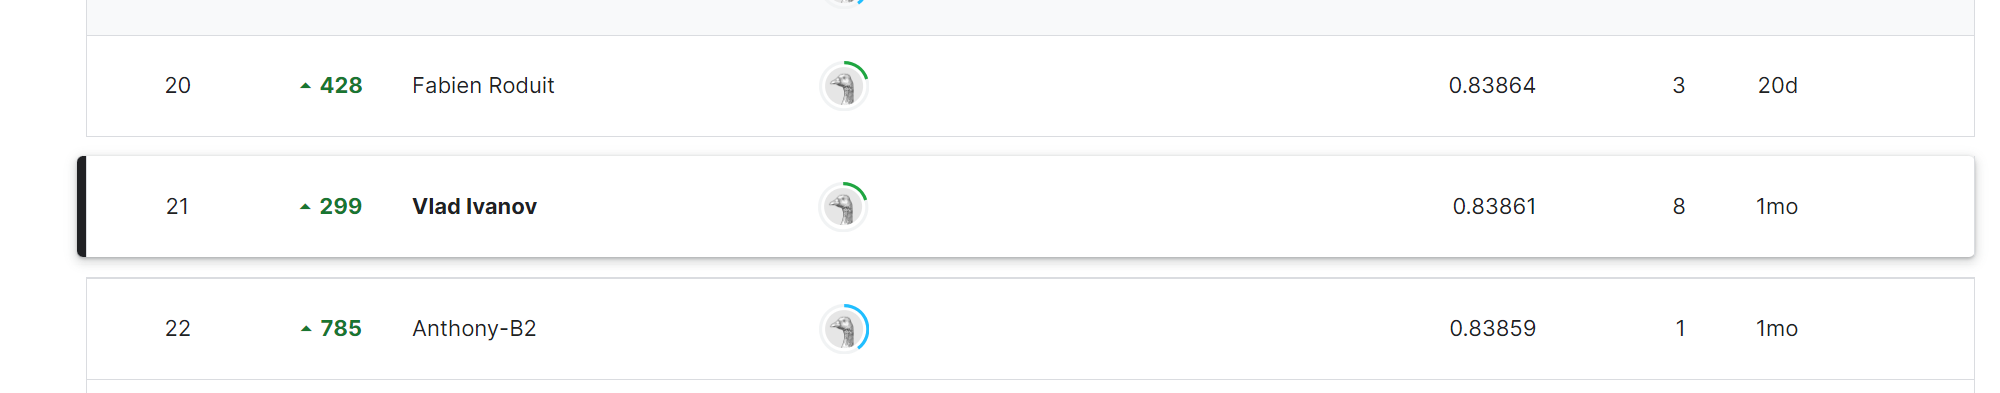

По финальному private score удалось занять **21 место из 2691 участников.** 

Лучший мой результат!


Уверен что сказалось решение подмешать в обучающую выборку данные из оригинального датасета, тем более что сами организаторы дали на него ссылку.

Результаты: https://www.kaggle.com/competitions/playground-series-s4e6/leaderboard